In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Datasets/Social_Network_Ads.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.shape

(400, 5)

#**EDA Analysis on Dataset**#

###**1. Univariate analysis**###

<Axes: >

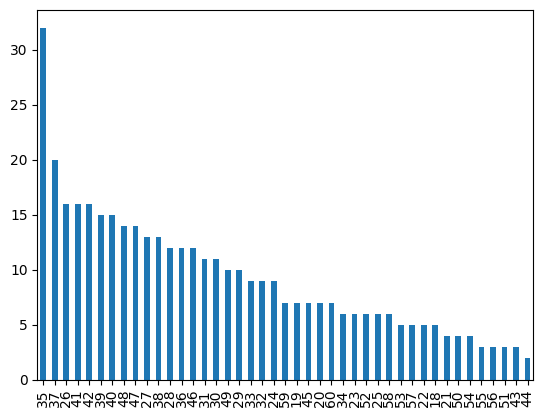

In [ ]:
df['Age'].value_counts().plot(kind='bar')

<ipython-input-61-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

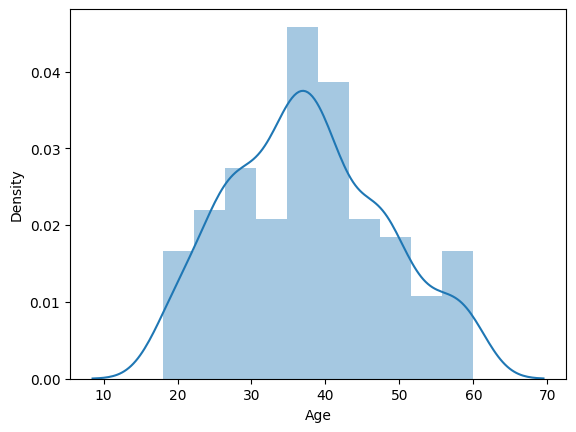

In [ ]:
sns.distplot(df['Age'])

<ipython-input-62-cca866f85a80>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

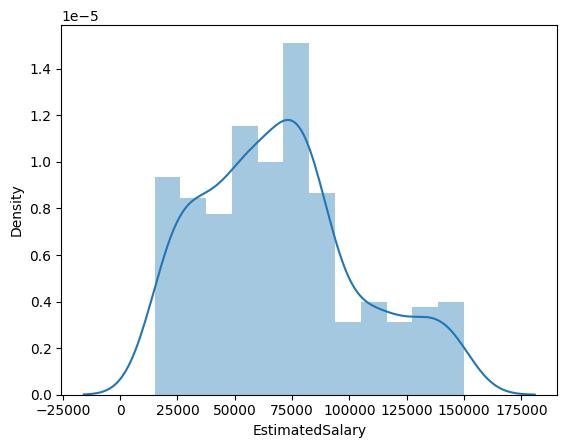

In [ ]:
sns.distplot(df['EstimatedSalary'])

<Axes: >

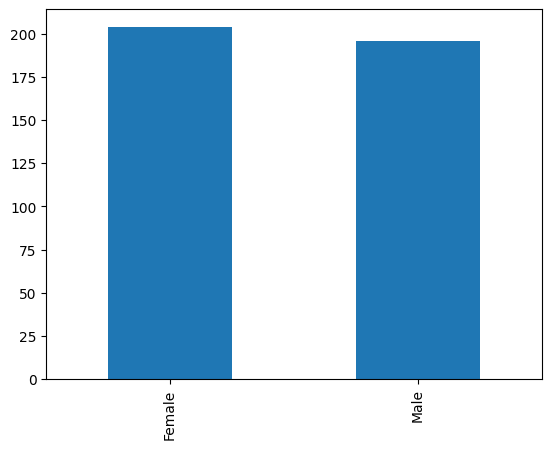

In [ ]:
df['Gender'].value_counts().plot(kind='bar')

###**2. Bivariate or Multivariate Analysis**###

<Axes: xlabel='Gender', ylabel='count'>

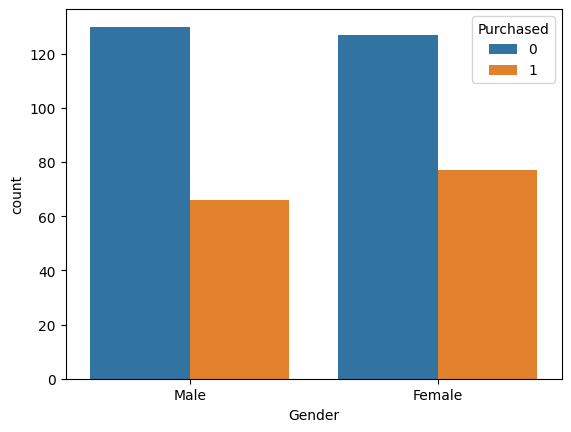

In [ ]:
sns.countplot(x=df['Gender'], hue=df['Purchased'])

<Axes: xlabel='Age', ylabel='Count'>

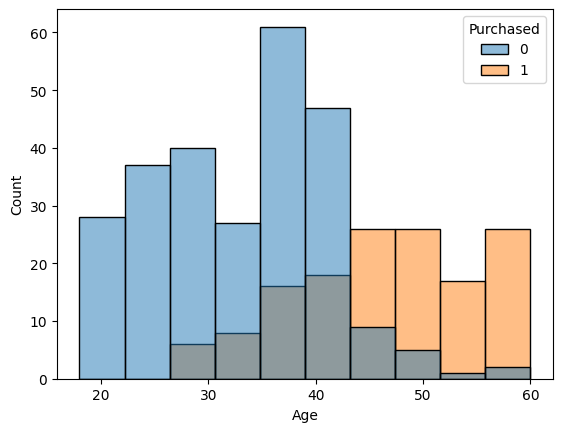

In [ ]:
sns.histplot(x=df['Age'], hue=df['Purchased'])

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

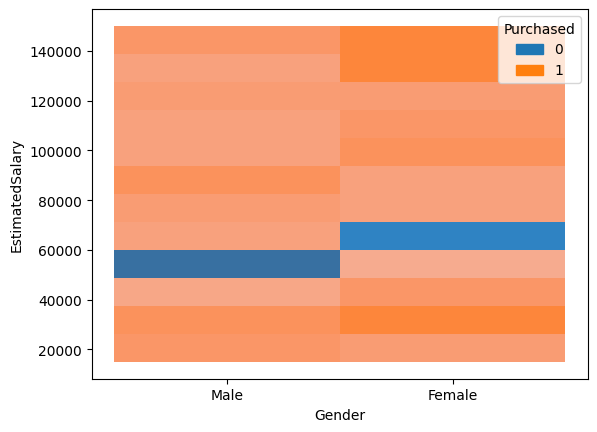

In [ ]:
sns.histplot(data=df, x='Gender', y='EstimatedSalary', hue='Purchased')

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

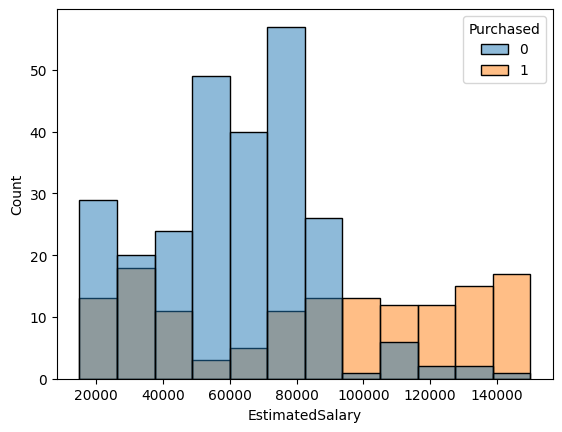

In [ ]:
sns.histplot(data=df, x='EstimatedSalary', hue='Purchased')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

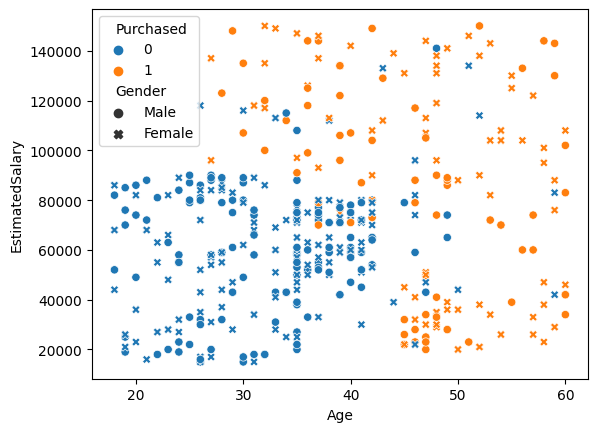

In [ ]:
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', style='Gender')

<ipython-input-69-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

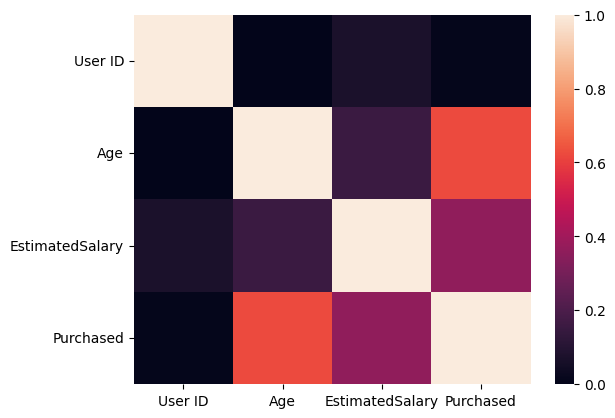

In [ ]:
sns.heatmap(df.corr())

#**Encoding Gender Column**#

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lr = LabelEncoder()

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [ ]:
df['Gender'].unique()

array([1, 0])

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


#**Feature Scaling Using Standard Scaler**#

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
df.loc[:,['Age', 'EstimatedSalary']]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
df.loc[:,['Age', 'EstimatedSalary']] = sc.fit_transform(df.loc[:,['Age', 'EstimatedSalary']].values)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,-1.781797,-1.490046,0
1,15810944,1,-0.253587,-1.460681,0
2,15668575,0,-1.113206,-0.785290,0
3,15603246,0,-1.017692,-0.374182,0
4,15804002,1,-1.781797,0.183751,0


#**Train Test Split**#

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,['Gender','Age', 'EstimatedSalary']], df.iloc[:,-1])

In [ ]:
x_train

,Gender,Age,EstimatedSalary
318,1,0.701544,-1.108303
103,0,-0.444614,2.327385
132,1,-0.731153,0.506764
42,1,-0.253587,1.123426
3,0,-1.017692,-0.374182
...,...,...,...
0,1,-1.781797,-1.490046
153,0,-0.158074,-0.579736
339,1,0.128465,1.534534
29,1,-0.635640,-1.519411


In [ ]:
x_test

,Gender,Age,EstimatedSalary
142,1,-0.253587,-0.315452
203,0,0.319491,0.036926
125,0,0.128465,-0.256722
216,1,1.083596,-0.139263
214,1,0.892570,-0.785290
...,...,...,...
352,0,0.415005,0.594859
24,1,0.797057,-1.372587
304,0,0.223978,-0.286087
296,1,0.415005,0.095656


In [ ]:
print(y_train, y_test)

318    1
103    1
132    0
42     0
3      0
      ..
0      0
153    0
339    1
29     0
2      0
Name: Purchased, Length: 300, dtype: int64 142    0
203    0
125    0
216    0
214    0
      ..
352    1
24     1
304    0
296    1
319    0
Name: Purchased, Length: 100, dtype: int64


#**Model Training**#

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr.predict(x_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
prediction = lr.predict(x_test)
predictionData = {"Prediction":prediction, "Actual":y_test}
predictionData = pd.DataFrame(predictionData)
predictionData.sample(5)

,Prediction,Actual
398,0,0
125,0,0
226,1,1
40,0,0
108,0,0


#**Matrices**#
1. Recall
2. Precision
3. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

###**1. Confusion Matrix**###

In [ ]:
confusion_matrix(y_test.values, prediction)

array([[56,  6],
       [ 9, 29]])

###**2. Accuracy Score**###

In [ ]:
accuracy_score(y_test, prediction)

0.85

###**3. Precision Score**###

In [ ]:
precision_score(y_test, prediction)

0.8285714285714286

###**4. Recall**###

In [ ]:
recall_score(y_test, prediction)

0.7631578947368421

###**5. Error Rate**###

In [ ]:
error_rate = 1- accuracy_score(y_test, prediction)

In [ ]:
error_rate*100

15.000000000000002